<h1><B>Translation Office anslysis and predection</B></h1>

<h2>1- Importing Libraries (Toolkit)</h2>

In [271]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [272]:
# Reading the data using Pandas

In [273]:
data=pd.read_csv('traductions.csv',sep=';')

In [274]:
data.head(20)

,client_id,name,prenom,telephone,traduction_id,created_at,id_document,document,prix,langue,nbcopie,nbimprimer
0,546,REBAHI,AMINE,558500659,701,2021-10-02 14:14:38,25,Certificat Médical,1200,fr->arb,1,1
1,547,BOUCHAFAA,AMAR,770130202,702,2021-10-02 14:26:58,40,Registre de Commerce,5000,arb->fr,1,1
2,543,DEGHOUL,MOHAMED,542764940,697,2021-10-02 15:46:12,107,CONTRAT DE TRAVAIL,1400,fr->arb,4,1
3,544,MAHDADI,ZHOUR,550478415,698,2021-10-03 13:14:34,28,Certificat De Travail,1000,arb->fr,1,1
4,545,DINE,AHMED,554780334,700,2021-10-03 14:09:26,1,attestation de travail,1500,arb->fr,1,1
5,555,CHERIGUI,MOUNIR,550262263,709,2021-10-04 07:30:00,4,Relevé de notes,1500,arb->fr,2,1
6,548,SEHILI,AMEL,555369007,703,2021-10-04 08:28:45,22,CERTIFICAT DE SCOLARITÉ,1500,fr->arb,1,1
7,548,SEHILI,AMEL,555369007,703,2021-10-04 08:28:45,4,Relevé de notes,1500,fr->arb,1,1
8,556,0809,slimane,774701881,710,2021-10-05 07:33:28,1,attestation de travail,1500,arb->fr,1,1
9,554,AHMED,BENYAHIA,776186142,712,2021-10-05 07:39:30,4,Relevé de notes,5000,arb->fr,1,1


In [275]:
data.shape
#We notice that we have 1007 line and 12 columns

(1007, 12)

In [276]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
client_id,1007.0,8.787249e+02,1.947077e+02,543.0,699.0,881.0,1038.5,1.231000e+03
telephone,1007.0,6.277049e+08,7.392320e+08,0.0,550724080.0,559126664.0,771021042.0,2.121321e+10
traduction_id,1007.0,1.132515e+03,2.480340e+02,697.0,915.5,1132.0,1344.5,1.563000e+03
id_document,1007.0,2.838729e+01,2.873487e+01,1.0,7.5,20.0,40.0,1.160000e+02
prix,1007.0,1.579245e+03,9.883900e+02,200.0,1100.0,1500.0,1500.0,2.000000e+04
nbcopie,1007.0,3.276068e+00,9.007025e+00,1.0,1.0,1.0,3.0,2.260000e+02
nbimprimer,1007.0,1.001986e+00,9.968154e-02,0.0,1.0,1.0,1.0,4.000000e+00


In [277]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   client_id      1007 non-null   int64 
 1   name           1007 non-null   object
 2   prenom         1007 non-null   object
 3   telephone      1007 non-null   int64 
 4   traduction_id  1007 non-null   int64 
 5   created_at     1007 non-null   object
 6   id_document    1007 non-null   int64 
 7   document       1007 non-null   object
 8   prix           1007 non-null   int64 
 9   langue         1007 non-null   object
 10  nbcopie        1007 non-null   int64 
 11  nbimprimer     1007 non-null   int64 
dtypes: int64(7), object(5)
memory usage: 94.5+ KB


<h3 style=" color: Blue ">The Info methode shows us that there is no-Null Data in our dataset !!!</h3>

<h2>Preprocessing data</h2>

In [278]:
data['name'].value_counts()

WEATHERFORD    14
SARL           12
ALLILOUCHE      7
RIZOUG          6
OUTAREB         6
               ..
AYACHE          1
CHEKOUR         1
OUNAS           1
SAMIA           1
AOUIOUECHE      1
Name: name, Length: 632, dtype: int64

In [279]:
data[(data['name'].str.contains('SARL')) | (data['name'].str.contains('EURL'))  ]

,client_id,name,prenom,telephone,traduction_id,created_at,id_document,document,prix,langue,nbcopie,nbimprimer
138,664,EURL,CIAMANET,555361835,827,2021-11-04 12:48:14,40,Registre de Commerce,3500,arb->ang,1,1
160,678,SARL,GTT,561778229,843,2021-11-09 10:37:58,40,Registre de Commerce,2200,fr->arb,1,1
206,706,SARL,CHEMICALS,561703206,874,2021-11-16 09:19:36,100,Statuts/Modif statuts,1500,fr->arb,5,1
207,706,SARL,CHEMICALS,561703206,874,2021-11-16 09:19:36,40,Registre de Commerce,2500,arb->fr,1,1
471,900,SARL,BILANCIAI,770507616,1108,2022-01-06 11:40:56,100,Statuts/Modif statuts,1000,arb->fr,13,1
472,900,SARL,BILANCIAI,770507616,1108,2022-01-06 11:40:56,40,Registre de Commerce,2500,arb->fr,1,1
692,900,SARL,BILANCIAI,770507616,1291,2022-02-21 14:58:19,7,extrait de role,1500,arb->fr,1,1
834,1132,SARL,LBVET,212121251,1415,2022-03-21 08:37:37,40,Registre de Commerce,3500,fr->arb,3,1
835,1132,SARL,LBVET,212121251,1415,2022-03-21 08:37:37,100,Statuts/Modif statuts,3500,fr->arb,18,1
836,1132,SARL,LBVET,212121251,1415,2022-03-21 08:37:37,54,Autorisation,3500,fr->arb,8,1


In [280]:
len(data[(data['name'].str.contains('SARL')) | (data['name'].str.contains('EURL'))])

13

In [281]:
data['document'].value_counts()

Registre de Commerce            82
Relevé de notes                 77
Acte de naissance               56
attestation                     55
attestation de travail          54
                                ..
Acte de Vente et Suites          1
PASSEPORT                        1
Décision de Rectification        1
extrait de acte de naissance     1
ANNEX UNIVERSITE                 1
Name: document, Length: 64, dtype: int64

<h3 style="color: red">***** We can say that we have 64 diffrent type of document but it can be less, for exemple the document "Attestation" and "attestation de travail" may have the same meaning, maybe the employee was late so he didn't take attention ...***** </h3>

In [282]:
data[data['document'].str.contains('attestation ') ]

,client_id,name,prenom,telephone,traduction_id,created_at,id_document,document,prix,langue,nbcopie,nbimprimer
4,545,DINE,AHMED,554780334,700,2021-10-03 14:09:26,1,attestation de travail,1500,arb->fr,1,1
8,556,0809,slimane,774701881,710,2021-10-05 07:33:28,1,attestation de travail,1500,arb->fr,1,1
34,572,BEGGAH,MUSTAPHA,771997013,732,2021-10-12 09:02:36,1,attestation de travail,1500,arb->fr,1,1
133,659,TOUNSI,AHMED,774079300,822,2021-11-04 08:52:32,66,attestation de non travail,1500,fr->arb,3,1
141,666,MORSLI,MOHAMED,797682632,829,2021-11-06 15:07:34,1,attestation de travail,1500,arb->ang,1,1
144,668,BOUCHENDOUKA,LAKHDER,781938447,831,2021-11-06 15:14:56,1,attestation de travail,1500,arb->fr,1,1
146,669,BEN BELKACEM,HOCINE,552500114,833,2021-11-07 08:19:48,1,attestation de travail,1500,ang->arb,4,1
177,666,MORSLI,MOHAMED,797682632,852,2021-11-11 15:26:44,1,attestation de travail,1500,arb->fr,1,1
203,702,TAHRI,LAMINE,556217425,871,2021-11-16 08:27:29,1,attestation de travail,1500,fr->ang,3,1
209,544,MAHDADI,ZHOUR,550478415,876,2021-11-16 12:19:37,1,attestation de travail,1000,arb->fr,1,1


In [283]:
data.isnull().sum()

client_id        0
name             0
prenom           0
telephone        0
traduction_id    0
created_at       0
id_document      0
document         0
prix             0
langue           0
nbcopie          0
nbimprimer       0
dtype: int64

<h2>Exploring & Analysing Data</h2>

In [284]:
data.sample(20)

,client_id,name,prenom,telephone,traduction_id,created_at,id_document,document,prix,langue,nbcopie,nbimprimer
580,970,BRAHIMI,KHOUNIA,674576239,1196,2022-01-27 16:13:24,7,extrait de role,1500,arb->fr,1,1
134,660,DAHDOUH,TOUFIK,791486447,823,2021-11-04 10:04:25,21,Dossier Juridique,1000,fr->arb,3,1
643,784,OUTAREB,SIHEM,774376506,1249,2022-02-12 16:02:24,35,Réimprimer,1000,fr->ang,1,1
874,1160,MOUSSOUS,MOHAMMED,43,1451,2022-03-29 10:18:29,2,CERTIFICAT DE RÉSIDENCE,1000,arb->fr,1,1
551,953,YAHIAYTENE,KARIMA,23307517,1176,2022-01-24 15:12:29,1,attestation de travail,1200,fr->arb,2,1
727,1056,KHEBAB,RABAH,661510410,1319,2022-02-27 16:38:28,33,استنساخ,2000,fr->arb,1,1
507,924,BRAHIMI,TAKIEDDINE,796341670,1136,2022-01-13 11:47:58,11,Diplome,1500,fr->ang,1,1
156,675,Mr,HALLALI,552369911,839,2021-11-08 13:21:37,13,Jugement,2000,fr->arb,8,1
286,769,RAMI,NADIR,18,944,2021-12-01 15:07:01,13,Jugement,1000,arb->ang,8,1
381,837,KETFI,MOKHTAR,552213944,1028,2021-12-20 10:47:38,13,Jugement,1500,arb->fr,6,1


In [285]:
data['langue'].value_counts()

fr->arb     447
arb->fr     416
arb->ang     97
fr->ang      35
ang->fr       8
ang->arb      4
Name: langue, dtype: int64

<h3 style="color: red">***** Intresting detail !!! The most translations was done from FR=>ARB with 447 item and from ARB=> FR with 416  In</h3>

<AxesSubplot:xlabel='langue', ylabel='count'>

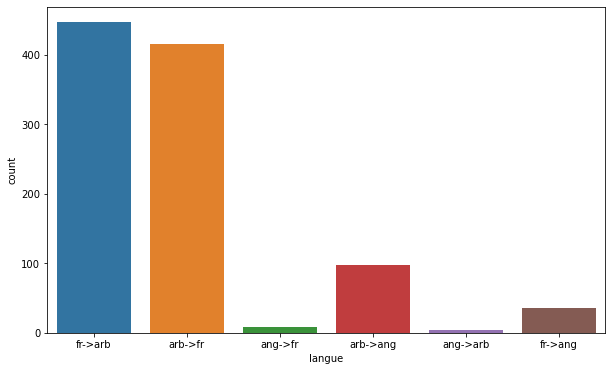

In [286]:
plt.figure(figsize=(10,6))
sns.countplot(data=data,x='langue')

# Feature Engineering

In [287]:
data['created_at']

0       2021-10-02 14:14:38
1       2021-10-02 14:26:58
2       2021-10-02 15:46:12
3       2021-10-03 13:14:34
4       2021-10-03 14:09:26
               ...         
1002    2022-04-26 14:05:54
1003    2022-04-27 10:12:51
1004    2022-04-27 10:51:07
1005    2022-04-27 12:50:14
1006    2022-04-27 14:45:05
Name: created_at, Length: 1007, dtype: object

In [288]:
# let's start modifig the data set but in order to be confident in working let's create first a copy of our dataset
df = data.copy()

In [289]:
df.head()

,client_id,name,prenom,telephone,traduction_id,created_at,id_document,document,prix,langue,nbcopie,nbimprimer
0,546,REBAHI,AMINE,558500659,701,2021-10-02 14:14:38,25,Certificat Médical,1200,fr->arb,1,1
1,547,BOUCHAFAA,AMAR,770130202,702,2021-10-02 14:26:58,40,Registre de Commerce,5000,arb->fr,1,1
2,543,DEGHOUL,MOHAMED,542764940,697,2021-10-02 15:46:12,107,CONTRAT DE TRAVAIL,1400,fr->arb,4,1
3,544,MAHDADI,ZHOUR,550478415,698,2021-10-03 13:14:34,28,Certificat De Travail,1000,arb->fr,1,1
4,545,DINE,AHMED,554780334,700,2021-10-03 14:09:26,1,attestation de travail,1500,arb->fr,1,1


In [290]:
# Here we create another field called date by transforming the fieature created_at to a date time type
df['date'] = pd.to_datetime(df['created_at'])

In [291]:
# Adding the year field in our data 
df['year'] = df['date'].apply(lambda x:x.year)

In [292]:
df.head()

,client_id,name,prenom,telephone,traduction_id,created_at,id_document,document,prix,langue,nbcopie,nbimprimer,date,year
0,546,REBAHI,AMINE,558500659,701,2021-10-02 14:14:38,25,Certificat Médical,1200,fr->arb,1,1,2021-10-02 14:14:38,2021
1,547,BOUCHAFAA,AMAR,770130202,702,2021-10-02 14:26:58,40,Registre de Commerce,5000,arb->fr,1,1,2021-10-02 14:26:58,2021
2,543,DEGHOUL,MOHAMED,542764940,697,2021-10-02 15:46:12,107,CONTRAT DE TRAVAIL,1400,fr->arb,4,1,2021-10-02 15:46:12,2021
3,544,MAHDADI,ZHOUR,550478415,698,2021-10-03 13:14:34,28,Certificat De Travail,1000,arb->fr,1,1,2021-10-03 13:14:34,2021
4,545,DINE,AHMED,554780334,700,2021-10-03 14:09:26,1,attestation de travail,1500,arb->fr,1,1,2021-10-03 14:09:26,2021


In [293]:
# Adding the mounth field in our data 
df['month'] = df['date'].apply(lambda x:x.month)

In [294]:
df.head()

,client_id,name,prenom,telephone,traduction_id,created_at,id_document,document,prix,langue,nbcopie,nbimprimer,date,year,month
0,546,REBAHI,AMINE,558500659,701,2021-10-02 14:14:38,25,Certificat Médical,1200,fr->arb,1,1,2021-10-02 14:14:38,2021,10
1,547,BOUCHAFAA,AMAR,770130202,702,2021-10-02 14:26:58,40,Registre de Commerce,5000,arb->fr,1,1,2021-10-02 14:26:58,2021,10
2,543,DEGHOUL,MOHAMED,542764940,697,2021-10-02 15:46:12,107,CONTRAT DE TRAVAIL,1400,fr->arb,4,1,2021-10-02 15:46:12,2021,10
3,544,MAHDADI,ZHOUR,550478415,698,2021-10-03 13:14:34,28,Certificat De Travail,1000,arb->fr,1,1,2021-10-03 13:14:34,2021,10
4,545,DINE,AHMED,554780334,700,2021-10-03 14:09:26,1,attestation de travail,1500,arb->fr,1,1,2021-10-03 14:09:26,2021,10


In [295]:
# Adding the dayofweek field in our data 
df['dayofweek'] = df['date'].apply(lambda x:x.dayofweek)

In [296]:
# Adding the -day-of-month field in our data 
df['dayofmonth'] = df['date'].apply(lambda x:x.day)

In [297]:
df.head()

,client_id,name,prenom,telephone,traduction_id,created_at,id_document,document,prix,langue,nbcopie,nbimprimer,date,year,month,dayofweek,dayofmonth
0,546,REBAHI,AMINE,558500659,701,2021-10-02 14:14:38,25,Certificat Médical,1200,fr->arb,1,1,2021-10-02 14:14:38,2021,10,5,2
1,547,BOUCHAFAA,AMAR,770130202,702,2021-10-02 14:26:58,40,Registre de Commerce,5000,arb->fr,1,1,2021-10-02 14:26:58,2021,10,5,2
2,543,DEGHOUL,MOHAMED,542764940,697,2021-10-02 15:46:12,107,CONTRAT DE TRAVAIL,1400,fr->arb,4,1,2021-10-02 15:46:12,2021,10,5,2
3,544,MAHDADI,ZHOUR,550478415,698,2021-10-03 13:14:34,28,Certificat De Travail,1000,arb->fr,1,1,2021-10-03 13:14:34,2021,10,6,3
4,545,DINE,AHMED,554780334,700,2021-10-03 14:09:26,1,attestation de travail,1500,arb->fr,1,1,2021-10-03 14:09:26,2021,10,6,3


In [298]:
# Adding the hour field in our data 
# I'll create a function to get the approched exact hour for example "14:38" well be 15 and not 14

def ApprochedHour(date):
    if date.minute >=30: # for example "14:38" the function well return 15
        return date.hour + 1
    else:
        return date.hour

    


In [299]:
import datetime as dt

dtime = dt.datetime.now()

print(dtime)
print(dtime.tzinfo)

print(ApprochedHour(dtime))

2022-04-29 18:38:35.302007
None
19


In [300]:
# Applying the function created "ApprochedHour" on the date_ fieldtime

df['hour'] = df['date'].apply(lambda x:ApprochedHour(x))

# Removing the Created_at field we don't need it more

In [301]:
df = df.drop('created_at',axis=1)

In [302]:
df.head(-5)

,client_id,name,prenom,telephone,traduction_id,id_document,document,prix,langue,nbcopie,nbimprimer,date,year,month,dayofweek,dayofmonth,hour
0,546,REBAHI,AMINE,558500659,701,25,Certificat Médical,1200,fr->arb,1,1,2021-10-02 14:14:38,2021,10,5,2,14
1,547,BOUCHAFAA,AMAR,770130202,702,40,Registre de Commerce,5000,arb->fr,1,1,2021-10-02 14:26:58,2021,10,5,2,14
2,543,DEGHOUL,MOHAMED,542764940,697,107,CONTRAT DE TRAVAIL,1400,fr->arb,4,1,2021-10-02 15:46:12,2021,10,5,2,16
3,544,MAHDADI,ZHOUR,550478415,698,28,Certificat De Travail,1000,arb->fr,1,1,2021-10-03 13:14:34,2021,10,6,3,13
4,545,DINE,AHMED,554780334,700,1,attestation de travail,1500,arb->fr,1,1,2021-10-03 14:09:26,2021,10,6,3,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,586,SENHADJI,FATEH,550724080,1556,40,Registre de Commerce,2500,arb->fr,1,1,2022-04-25 12:17:31,2022,4,0,25,12
998,586,SENHADJI,FATEH,550724080,1556,100,Statuts/Modif statuts,2000,arb->fr,1,1,2022-04-25 12:17:31,2022,4,0,25,12
999,1225,LABANE,ABDERRAHMANE,557949098,1557,5,Diplome BAC,1200,arb->fr,1,1,2022-04-26 11:53:18,2022,4,1,26,12
1000,1225,LABANE,ABDERRAHMANE,557949098,1557,4,Relevé de notes,1200,arb->fr,1,1,2022-04-26 11:53:18,2022,4,1,26,12


In [303]:
df['month'].value_counts()
# Number of translations seems  approach during all months

12    165
11    158
3     148
2     147
1     146
4     122
10    121
Name: month, dtype: int64

<AxesSubplot:xlabel='month', ylabel='count'>

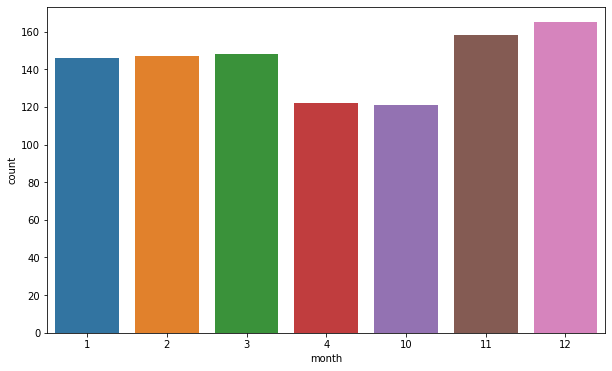

In [304]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='month')

In [305]:
df['hour'].value_counts()
# We can say that the customers usually visit the office in the afternoon 

15    159
14    142
12    133
11    128
16    124
13    113
9      77
10     75
17     31
8      23
18      1
19      1
Name: hour, dtype: int64

<AxesSubplot:xlabel='hour', ylabel='count'>

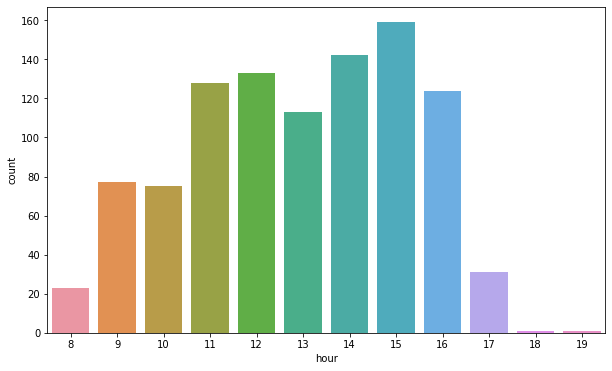

In [306]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='hour')

In [307]:
df['dayofweek'].value_counts()
# We can say that the customers usually visit the office in the afternoon 

1    197
0    187
6    175
2    172
3    157
5    119
Name: dayofweek, dtype: int64

<AxesSubplot:xlabel='dayofweek', ylabel='count'>

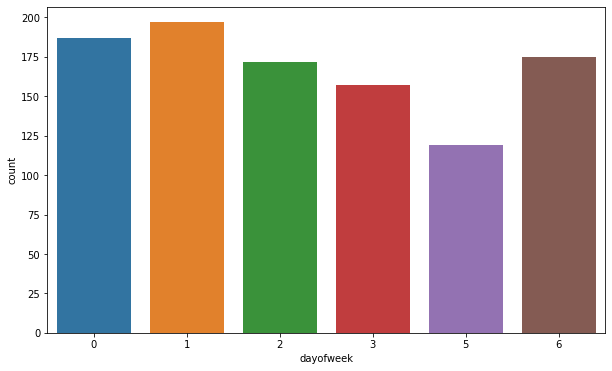

In [308]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='dayofweek')

In [309]:
# "0"  indicates Monday, we can say that the count number of translation according to daysOfWeek is close ( saturday's translation is lower  ) 

In [310]:
# Total income per day of week (Agregation)
df.groupby(['dayofweek'])['prix'].sum()#.reset_index()


dayofweek
0    288900
1    298850
2    279100
3    260300
5    202850
6    260300
Name: prix, dtype: int64

In [311]:
# Total income per day of week (Agregation)
df.groupby(['dayofweek'])['prix'].sum().reset_index()

,dayofweek,prix
0,0,288900
1,1,298850
2,2,279100
3,3,260300
4,5,202850
5,6,260300


<AxesSubplot:xlabel='dayofweek', ylabel='prix'>

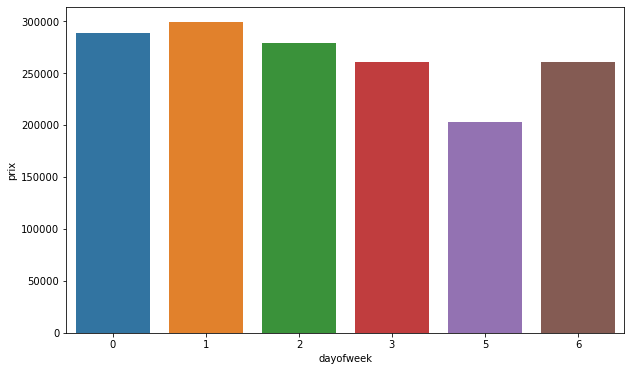

In [312]:
plt.figure(figsize=(10,6))
sns.barplot(x='dayofweek',y='prix', data=df.groupby(['dayofweek'])['prix'].sum().reset_index())

In [313]:
# Along the office period of work saturday has the lowest income, The others roughly has the same income

<AxesSubplot:xlabel='dayofweek', ylabel='count'>

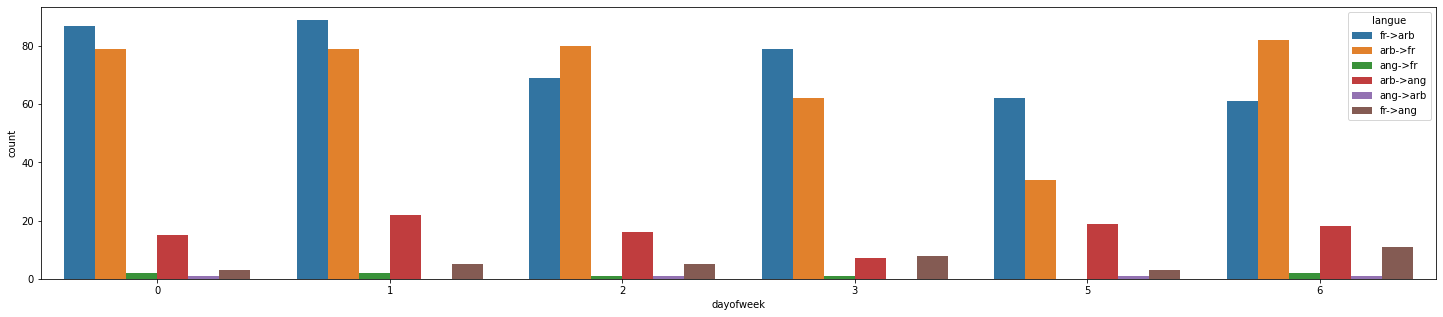

In [314]:
plt.figure(figsize=(25,5))
sns.countplot(x='dayofweek',data=df,hue='langue')

<AxesSubplot:xlabel='hour', ylabel='count'>

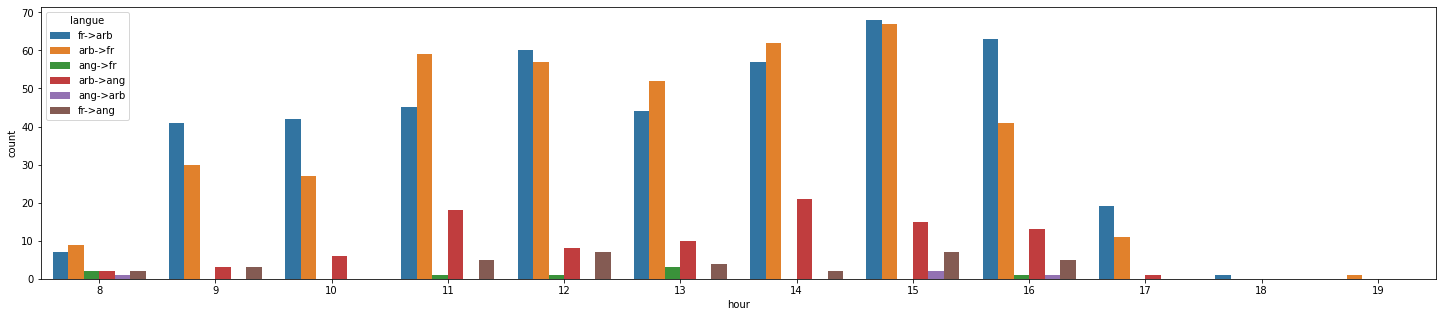

In [315]:
%matplotlib inline 
plt.figure(figsize=(25,5))
sns.countplot(x='hour',data=df,hue='langue')

In [316]:
# To calculate the total for one translation for a customer: 
df['total'] = df['prix'] * df['nbcopie']

In [317]:
df.head()

,client_id,name,prenom,telephone,traduction_id,id_document,document,prix,langue,nbcopie,nbimprimer,date,year,month,dayofweek,dayofmonth,hour,total
0,546,REBAHI,AMINE,558500659,701,25,Certificat Médical,1200,fr->arb,1,1,2021-10-02 14:14:38,2021,10,5,2,14,1200
1,547,BOUCHAFAA,AMAR,770130202,702,40,Registre de Commerce,5000,arb->fr,1,1,2021-10-02 14:26:58,2021,10,5,2,14,5000
2,543,DEGHOUL,MOHAMED,542764940,697,107,CONTRAT DE TRAVAIL,1400,fr->arb,4,1,2021-10-02 15:46:12,2021,10,5,2,16,5600
3,544,MAHDADI,ZHOUR,550478415,698,28,Certificat De Travail,1000,arb->fr,1,1,2021-10-03 13:14:34,2021,10,6,3,13,1000
4,545,DINE,AHMED,554780334,700,1,attestation de travail,1500,arb->fr,1,1,2021-10-03 14:09:26,2021,10,6,3,14,1500


In [318]:
# lets try to round the type of document  

In [319]:
# This Function return the First word of the document name with lowercase
def first_word_lower(x):
    return (x.split()[0]).lower()

In [320]:
first_word_lower('Certificat Médical')

'certificat'

In [321]:
df['doc'] = df['document'].apply(lambda x: first_word_lower(x) )

In [322]:
df.head()

,client_id,name,prenom,telephone,traduction_id,id_document,document,prix,langue,nbcopie,nbimprimer,date,year,month,dayofweek,dayofmonth,hour,total,doc
0,546,REBAHI,AMINE,558500659,701,25,Certificat Médical,1200,fr->arb,1,1,2021-10-02 14:14:38,2021,10,5,2,14,1200,certificat
1,547,BOUCHAFAA,AMAR,770130202,702,40,Registre de Commerce,5000,arb->fr,1,1,2021-10-02 14:26:58,2021,10,5,2,14,5000,registre
2,543,DEGHOUL,MOHAMED,542764940,697,107,CONTRAT DE TRAVAIL,1400,fr->arb,4,1,2021-10-02 15:46:12,2021,10,5,2,16,5600,contrat
3,544,MAHDADI,ZHOUR,550478415,698,28,Certificat De Travail,1000,arb->fr,1,1,2021-10-03 13:14:34,2021,10,6,3,13,1000,certificat
4,545,DINE,AHMED,554780334,700,1,attestation de travail,1500,arb->fr,1,1,2021-10-03 14:09:26,2021,10,6,3,14,1500,attestation


In [323]:
df['doc'].value_counts()

attestation      145
acte             106
certificat       105
registre          82
diplome           79
relevé            77
dossier           77
casier            52
extrait           47
jugement          34
réimprimer        31
carte             30
documents         18
bulletin          11
استنساخ           11
contrat           11
frédha             9
livret             9
fiche              8
statuts/modif      8
procuration        8
doc                8
rapport            7
lettre             7
autorisation       3
kaffala            3
procès-verbal      3
traduction         3
declaration        3
non                2
permis             2
modification       2
copie              2
passeport          1
déclaration        1
décision           1
annex              1
Name: doc, dtype: int64

In [324]:
len(df['doc'].unique())

37

<h1>Prediction</h1>

<h3>Nice! Untile now let's try to implimante a new model to predict the income revenue for a specific day</h3>

In [325]:
df_day = df.copy()

In [326]:
df_day.head()

,client_id,name,prenom,telephone,traduction_id,id_document,document,prix,langue,nbcopie,nbimprimer,date,year,month,dayofweek,dayofmonth,hour,total,doc
0,546,REBAHI,AMINE,558500659,701,25,Certificat Médical,1200,fr->arb,1,1,2021-10-02 14:14:38,2021,10,5,2,14,1200,certificat
1,547,BOUCHAFAA,AMAR,770130202,702,40,Registre de Commerce,5000,arb->fr,1,1,2021-10-02 14:26:58,2021,10,5,2,14,5000,registre
2,543,DEGHOUL,MOHAMED,542764940,697,107,CONTRAT DE TRAVAIL,1400,fr->arb,4,1,2021-10-02 15:46:12,2021,10,5,2,16,5600,contrat
3,544,MAHDADI,ZHOUR,550478415,698,28,Certificat De Travail,1000,arb->fr,1,1,2021-10-03 13:14:34,2021,10,6,3,13,1000,certificat
4,545,DINE,AHMED,554780334,700,1,attestation de travail,1500,arb->fr,1,1,2021-10-03 14:09:26,2021,10,6,3,14,1500,attestation


In [327]:
# we don't need the client_id, name prenom , telephone

In [328]:
df_day= df_day.drop(['client_id','name','prenom','telephone','prix','nbcopie','nbimprimer'],axis=1)

In [329]:
df_day.head()

,traduction_id,id_document,document,langue,date,year,month,dayofweek,dayofmonth,hour,total,doc
0,701,25,Certificat Médical,fr->arb,2021-10-02 14:14:38,2021,10,5,2,14,1200,certificat
1,702,40,Registre de Commerce,arb->fr,2021-10-02 14:26:58,2021,10,5,2,14,5000,registre
2,697,107,CONTRAT DE TRAVAIL,fr->arb,2021-10-02 15:46:12,2021,10,5,2,16,5600,contrat
3,698,28,Certificat De Travail,arb->fr,2021-10-03 13:14:34,2021,10,6,3,13,1000,certificat
4,700,1,attestation de travail,arb->fr,2021-10-03 14:09:26,2021,10,6,3,14,1500,attestation


In [330]:
df_day= df_day.drop(['langue','document','id_document','date','doc'],axis=1)

In [331]:
df_day.head()

,traduction_id,year,month,dayofweek,dayofmonth,hour,total
0,701,2021,10,5,2,14,1200
1,702,2021,10,5,2,14,5000
2,697,2021,10,5,2,16,5600
3,698,2021,10,6,3,13,1000
4,700,2021,10,6,3,14,1500


In [332]:
df_day= df_day.drop(['traduction_id'],axis=1)

In [333]:
df_day= df_day.drop(['hour'],axis=1)

In [334]:
df_day= df_day.drop(['year'],axis=1)

In [335]:
df_day.head()

,month,dayofweek,dayofmonth,total
0,10,5,2,1200
1,10,5,2,5000
2,10,5,2,5600
3,10,6,3,1000
4,10,6,3,1500


In [336]:
df_day.groupby(['month','dayofweek']).sum('total')

dayofmonth   total
month dayofweek                    
1     0                 605  116000
      1                 384  108400
      2                 300   33100
      3                 534   98700
      5                 157   23500
      6                 354   86200
2     0                 581  268100
      1                 254  228400
      2                 325   57800
      3                 258   41500
      5                 289   54300
      6                 522   81000
3     0                 546  255200
      1                 525  124100
      2                 225  128300
      3                 417  124600
      5                 122   31500
      6                 432   92000
4     0                 289   54800
      1                 484  193200
      2                 304  393300
      3                 210   43900
      5                  78   86000
      6                 308   72200
10    0                 250   88900
      1                 227   53500
      2                 199   71700
      3                  77   24000
      5                1138  452300
      6                 490   64900
11    0                 315   64400
      1                 493  141600
      2                 935  228700
      3                 360  164900
      5                 101   17300
      6                 392   58100
12    0                 546  157900
      1                 434   70500
      2                 411  102400
      3                 577  133100
      5                 133   32600
      6                 456   87300